In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [93]:
df = pd.read_csv('c:/py_data/picher_stats_2017.csv')
df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [94]:
df.columns   # 칼럼을 보며 X(독립변수) 와 y(종속변수)를 파악하자

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [95]:
# 컬럼명들이 한글이니까 에러 방지를 위해 폰트설정
#차트 한글 표현을 위한 폰트 변경
import matplotlib.font_manager as fm    # 파일 경로 지시

fl = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family=fl)

In [96]:
# 승 과 연봉 관계 비교해보기

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [98]:
df.isnull().sum()

선수명         0
팀명          0
승           0
패           0
세           0
홀드          0
블론          0
경기          0
선발          0
이닝          0
삼진/9        0
볼넷/9        0
홈런/9        0
BABIP       0
LOB%        0
ERA         0
RA9-WAR     0
FIP         0
kFIP        0
WAR         0
연봉(2018)    0
연봉(2017)    0
dtype: int64

In [99]:
# 피처 각각에 대한 scaling을 수행하는 함수로 단위 통일
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col]= df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [100]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
df = standard_scaling(df, scale_columns)
df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [101]:
ndf = df[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)','연봉(2018)']]
ndf.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017),연봉(2018)
0,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,2.734705,140000
1,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,1.337303,120000
2,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,5.329881,230000
3,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,3.333592,100000
4,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,2.734705,111000


<AxesSubplot:xlabel='승', ylabel='연봉(2018)'>

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


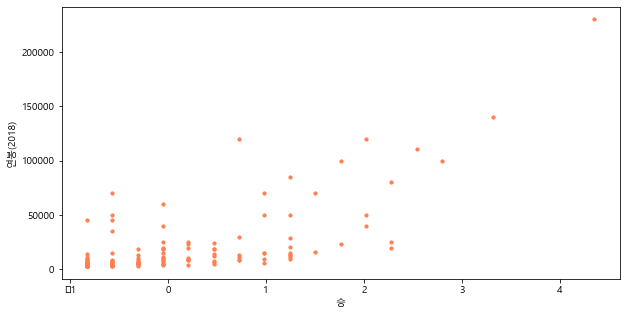

In [102]:
ndf.plot(kind='scatter', x='승', y='연봉(2018)',
         c='coral', s=10, figsize=(10,5))

<AxesSubplot:xlabel='승', ylabel='연봉(2018)'>

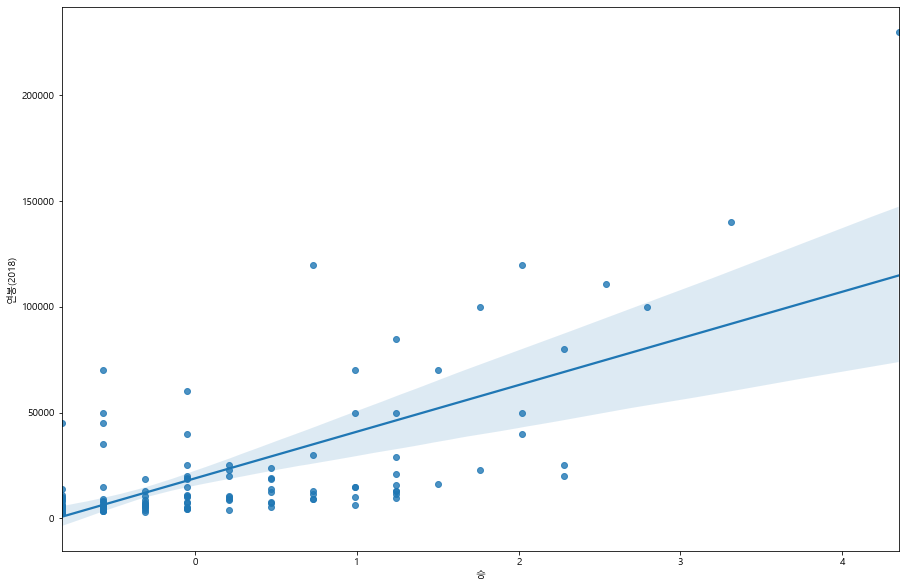

In [103]:
sns.regplot(x='승',y='연봉(2018)', data=ndf)

In [104]:
X = ndf[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']]
y= ndf['연봉(2018)']

In [105]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)


(106, 19)
(46, 19)


In [107]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [108]:
r_square = lr.score(X_test, y_test)
r_square

0.862834029656042

In [109]:
lr.coef_

array([  -154.88721396,   1167.75290139,  -1185.8284669 ,   -805.52188612,
         1197.41784025,   -547.43511871,  -5493.12810586,   2419.53656456,
        -1985.02590476,    403.14932691,   -195.99767558,   -571.81431678,
          436.54854487,   1133.44328858,   2406.65134302,  11252.07607743,
       -10508.95583288,   7224.35756538,  22264.41659309])

In [110]:
lr.intercept_

18676.59370112658

In [111]:
y_hat = lr.predict(X)
df_y = pd.DataFrame({'y_hat':y_hat, 'y':y})
df_y

,y_hat,y
0,111853.748184,140000
1,79596.545781,120000
2,163372.689284,230000
3,114763.715410,100000
4,99176.874890,111000
...,...,...
147,6037.879345,7100
148,-2164.813369,7500
149,12111.360004,10000
150,577.764518,4000


In [112]:
df_y['차이'] = df_y['y_hat']- df_y['y']
df_y

,y_hat,y,차이
0,111853.748184,140000,-28146.251816
1,79596.545781,120000,-40403.454219
2,163372.689284,230000,-66627.310716
3,114763.715410,100000,14763.715410
4,99176.874890,111000,-11823.125110
...,...,...,...
147,6037.879345,7100,-1062.120655
148,-2164.813369,7500,-9664.813369
149,12111.360004,10000,2111.360004
150,577.764518,4000,-3422.235482


C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


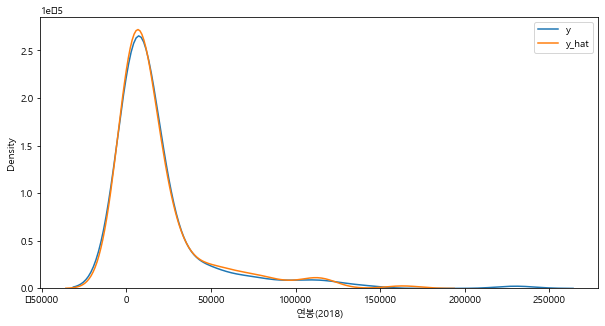

In [113]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat')
plt.legend()

### 다중공선성 제거(성능높이기)

<AxesSubplot:>

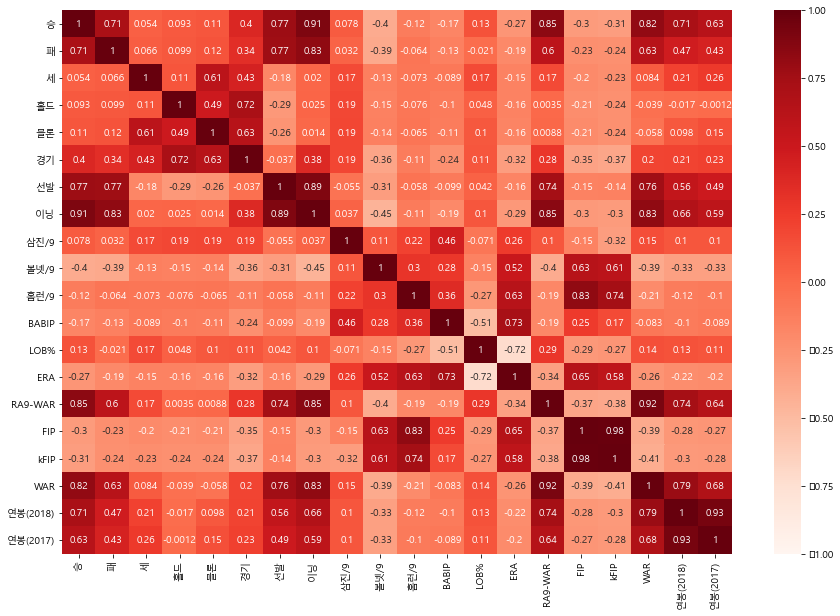

In [115]:
import seaborn as sb
df_corr=df[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)',
       '연봉(2017)']]
plt.rcParams['figure.figsize']=(15,10)

# 상관관계 히트맵으로 보기
sb.heatmap(df_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )

#### 회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF입니다.

VIF (Variance inflation Factors 분산팽창요인)

안전 : VIF < 5

주의 : 5 < VIF < 10

위험 : 10 < VIF

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])]
vif["features"] = df_corr.columns
vif

,VIF Factor,features
0,7.733989,승
1,5.301088,패
2,3.037209,세
3,3.636067,홀드
4,2.760823,블론
5,14.227864,경기
6,36.258907,선발
7,60.356532,이닝
8,78.720067,삼진/9
9,50.744095,볼넷/9


In [117]:
# VIF 계수가 높은 피처 삭제
df_corr=df_corr.drop(['홈런/9','kFIP','FIP'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])]
vif["features"] = df_corr.columns
vif

,VIF Factor,features
0,7.722854,승
1,5.183723,패
2,3.029943,세
3,3.621560,홀드
4,2.738909,블론
5,14.007150,경기
6,36.183453,선발
7,59.098829,이닝
8,1.677087,삼진/9
9,1.979310,볼넷/9


In [118]:
# VIF 계수가 높은 피처 삭제
df_corr=df_corr.drop(['선발','이닝'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])]
vif["features"] = df_corr.columns
vif

,VIF Factor,features
0,6.712701,승
1,2.275159,패
2,2.554887,세
3,2.888735,홀드
4,2.645966,블론
5,4.921374,경기
6,1.667548,삼진/9
7,1.967261,볼넷/9
8,2.889747,BABIP
9,3.241073,LOB%


### 재검정

In [124]:
X = df[['승', '패', '세', '홀드', '블론', '경기', '삼진/9', '볼넷/9', 'BABIP', 'LOB%', 'ERA',
       'RA9-WAR', 'WAR', '연봉(2017)']]
y = df['연봉(2018)']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)

(106, 14)
(46, 14)


In [127]:
# 학습시키기
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [128]:
lr.coef_

array([-1244.98793966,  -574.6328091 ,  -417.38529389,  -242.15066201,
        1395.97463544,   866.98580193,  -544.29259531,   312.44794433,
        -855.41310786,   837.92208877,  2054.40776556,  1784.31932905,
        7054.36560306, 22252.65924191])

In [129]:
lr.intercept_

18647.717082453062

In [130]:
r_square = lr.score(X_test, y_test)
r_square

0.8587717653099178

In [132]:
y_hat = lr.predict(X)

In [133]:
df_y_re = pd.DataFrame({'y_hat':y_hat, 'y':y})
df_y_re['차이'] = df_y_re['y_hat'] - df_y_re['y']
df_y_re

,y_hat,y,차이
0,110181.880425,140000,-29818.119575
1,77026.306137,120000,-42973.693863
2,161486.473315,230000,-68513.526685
3,114545.591109,100000,14545.591109
4,99031.197058,111000,-11968.802942
...,...,...,...
147,4655.003975,7100,-2444.996025
148,609.130739,7500,-6890.869261
149,11171.156070,10000,1171.156070
150,-567.238087,4000,-4567.238087


C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


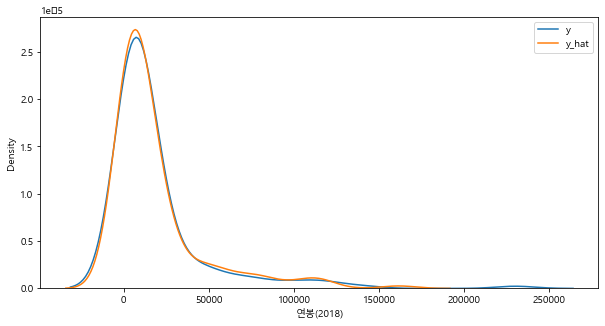

In [134]:
# 확률밀도함수 그리기
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat')
plt.legend()